RuntimeError: Lacking some keys, they are: {'rm_ratio'}

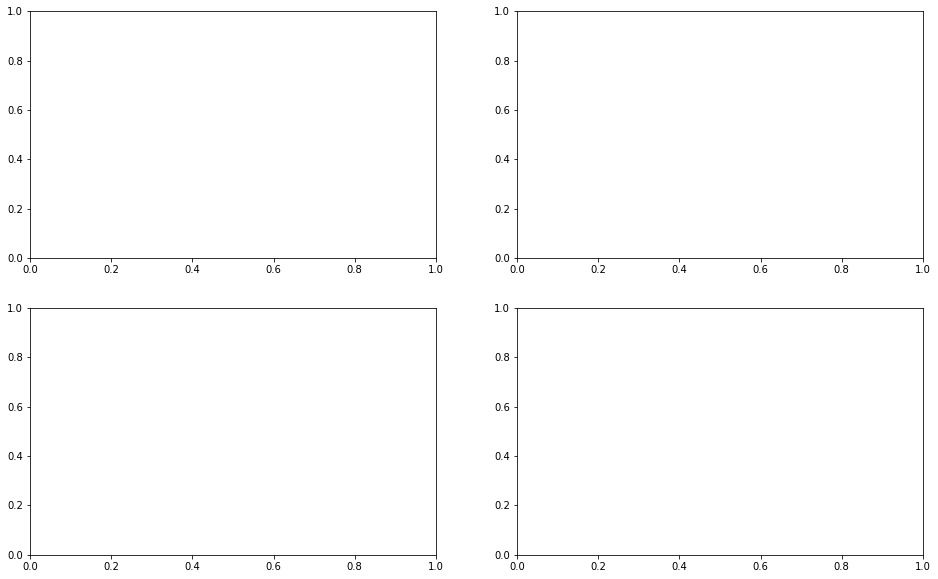

In [1]:
import yaml
from exprmngr import ExprMngr
from matplotlib.axes import Axes
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

write_buffer_size_list = (np.array([1,4,16,32,64])*1024**3).tolist()
zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
table_cache_numshardbits = 4
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
min_write_buffer_number_to_merge = 2
for workload in ['a','b']:
    for operationcount in [20000000]:
        for threads in [16]:
            for version in ['v0-hashskiplist-plaintable']:
                cache_size = 0
                for write_buffer_size in write_buffer_size_list:
                    min_write_buffer_number_to_merge = max_write_buffer_number - 2
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id})', end=' ')
                        continue
                    print(conf_id, end=' ')
                    single_dict['workload'] = workload
                    single_dict['write_buffer_size'] = write_buffer_size // 1024**2  # float(humanize.naturalsize(write_buffer_size, binary=True)[:-4])
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                    data_df[['write_buffer_size']] = data_df[['write_buffer_size']].astype(float)
            print()
            if data_df is None:
                continue
            ax: Axes = axs[ax_id // 2][ax_id % 2]
            sns.lineplot(x='write_buffer_size', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
            ax.tick_params(labelrotation=-30)
            ax.set_xticks(sorted(data_df['write_buffer_size'].unique().tolist()))
            ax.set_title(f'{workload=}')
            ax.set_ylim(0, data_df['throughput'].max() * 1.1)
            ax_id += 1
            mngr.conn.commit()
            data_df = None
plt.tight_layout()

skip(1054) skip(1055) skip(1056) skip(1057) skip(1058) 
926(b) 927(b) 989(b) 928(b) skip(929) 
skip(931) skip(932) skip(996) skip(933) skip(934) 


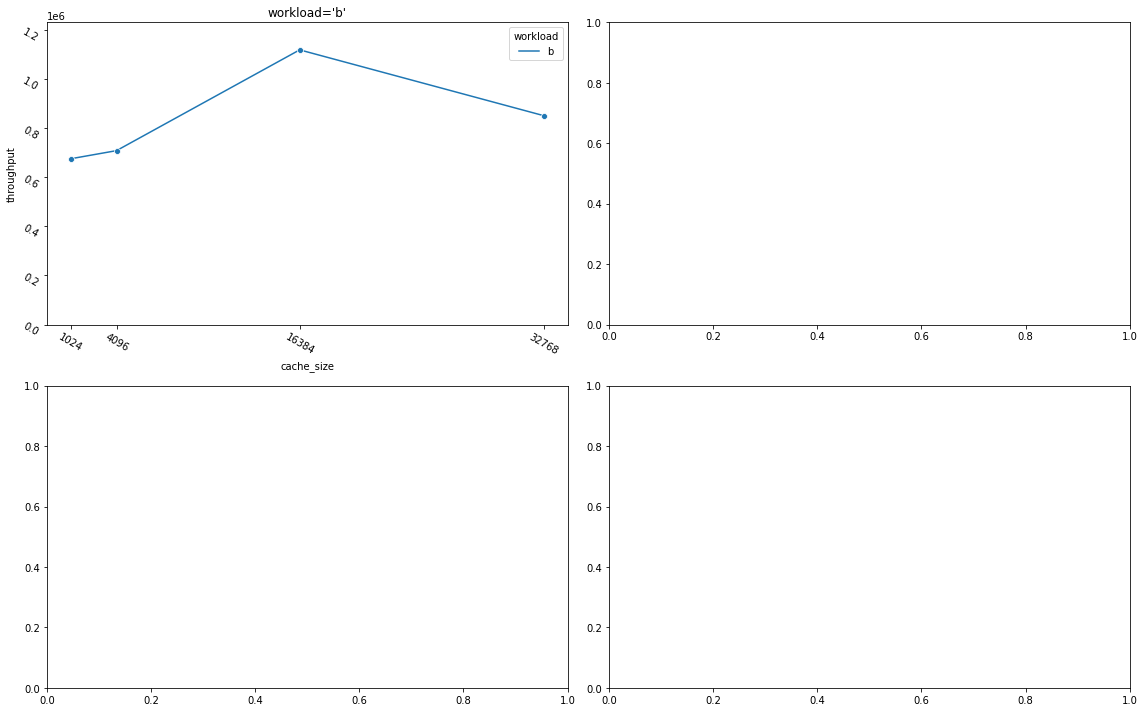

In [23]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

cache_size_list = (np.array([1,4,16,32,64])*1024**3).tolist()
requestdistribution = 'zipfian'
max_write_buffer_number=4
max_background_jobs = 8
table_cache_numshardbits = 4
zipfian_alpha = 0.99
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
for workload in ['a','b','c']:
    for operationcount in [20000000]:
        for threads in [32]:
            for version in ['v0']:
                write_buffer_size = 1*1024**3
                for cache_size in cache_size_list:
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id}({workload}))', end=' ')
                        continue
                    print(f'{conf_id}({workload})', end=' ')
                    single_dict['workload'] = workload
                    single_dict['cache_size'] = cache_size // 1024**2
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                    data_df[['cache_size']] = data_df[['cache_size']].astype(float)
                print()
                if data_df is None:
                    continue
                ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
                ax.set_title(f'{workload=}')
                sns.lineplot(x='cache_size', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
                ax.set_ylim(0, data_df['throughput'].max() * 1.1)
                ax.set_xticks(sorted(data_df['cache_size'].unique().tolist()))
                ax.tick_params(labelrotation=-30)
                ax_id += 1
                mngr.conn.commit()
                data_df = None
plt.tight_layout()

925(b) skip(1065) 1066(b) 1067(b) 1068(b) 1069(b) 


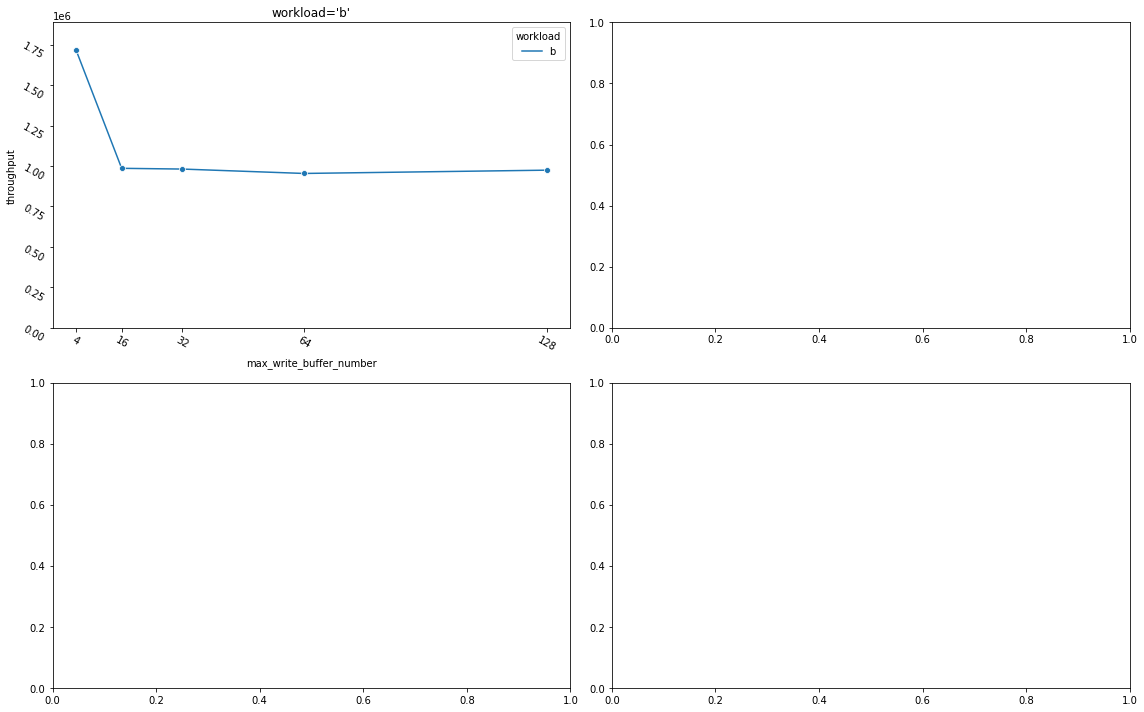

In [40]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

max_write_buffer_number_list = [4,8,16,32,64,128]
requestdistribution = 'zipfian'
max_write_buffer_number=4
max_background_jobs = 8
table_cache_numshardbits = 4
zipfian_alpha = 0.99
nrows = 2
fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
ax_id = 0
data_df = None
for workload in ['b']:
    for operationcount in [20000000]:
        for threads in [32]:
            for version in ['v0']:
                write_buffer_size = 1*1024**3
                cache_size = 0
                for max_write_buffer_number in max_write_buffer_number_list:
                    min_write_buffer_number_to_merge = max_write_buffer_number - 2
                    recordcount = 134217728
                    conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number, max_background_jobs=max_background_jobs,table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge)
                    if not osp.exists(mngr.get_local_log_path(conf_id)):
                        print(f'skip({conf_id})', end=' ')
                        continue
                    try:
                        single_dict = parse_log(mngr.get_local_log_path(conf_id))
                    except:
                        print(f'skip({conf_id}({workload}))', end=' ')
                        continue
                    print(f'{conf_id}({workload})', end=' ')
                    single_dict['workload'] = workload
                    single_dict['max_write_buffer_number'] = max_write_buffer_number
                    single_dict['version'] = version
                    single_df = pd.DataFrame([single_dict])
                    data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
                print()
                if data_df is None:
                    continue
                ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
                ax.set_title(f'{workload=}')
                sns.lineplot(x='max_write_buffer_number', y='throughput', hue='workload', data=data_df, marker='o', ax=ax)
                ax.set_ylim(0, data_df['throughput'].max() * 1.1)
                ax.set_xticks(sorted(data_df['max_write_buffer_number'].unique().tolist()))
                ax.tick_params(labelrotation=-30)
                ax_id += 1
                mngr.conn.commit()
                data_df = None
plt.tight_layout()

skip(1373) skip(1374) skip(1375) skip(1376) skip(1377) skip(1378) skip(1379) skip(1380) skip(1381) skip(1382) 1383(c) 1384(c) 1385(c) 1386(c) 1387(c) 


,throughput,runtime,workload,rm_ratio,threads,version
0,100.000000,22.8495,c,0.00,16,debug-v0
1,86.509074,26.4128,c,0.10,16,debug-v0
2,86.812858,26.3204,c,0.25,16,debug-v0
3,78.831864,28.9851,c,0.50,16,debug-v0
4,68.267961,33.4704,c,0.75,16,debug-v0


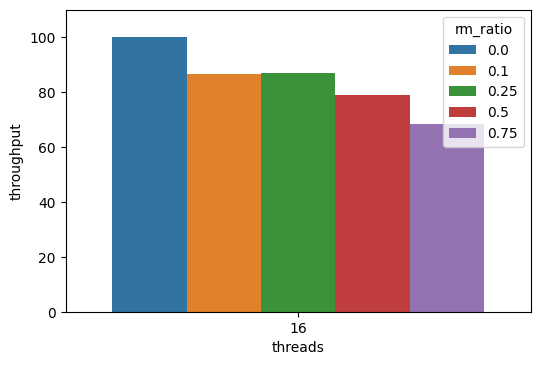

<Figure size 432x288 with 0 Axes>

In [5]:
import yaml
from exprmngr import ExprMngr
from ycsb_exprmngr import DB_PATH, parse_log
import seaborn as sns
import pandas as pd
import humanize
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np

table_def = yaml.load(open('etc/table_def.yaml').read(), Loader=yaml.SafeLoader)
config = yaml.load(open('etc/config.yaml').read(), Loader=yaml.SafeLoader)
mngr = ExprMngr(table_def, DB_PATH, config)

zipfian_alpha = 0.99
requestdistribution = 'zipfian'
max_write_buffer_number = 4
max_background_jobs = 8
workload = 'c'
operationcount = 20000000
min_write_buffer_number_to_merge = max_write_buffer_number - 2
write_buffer_size = 256*1024**2
recordcount = 134217728
ax_id = 0
data_df = None
table_cache_numshardbits = 6
version = 'debug-v0'

# nrows=2
# fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(16, nrows * 5), squeeze=False)
for cache_size in [64*1024**3]:
    for threads in [1,4,16]:
        # for rm_ratio in [0.0, 0.25,0.5, 0.75]:
        # for rm_ratio in [0.0, 0.4, 0.6, 0.8]:
        for rm_ratio in [0.0,0.1,0.25,0.5, 0.75]:
            write_buffer_size = 256*1024**2
            min_write_buffer_number_to_merge = max_write_buffer_number - 2
            recordcount = 134217728
            conf_id = mngr.get_id(workload=workload, recordcount=recordcount, operationcount=operationcount, threads=threads, write_buffer_size=write_buffer_size, cache_size=cache_size, version=version, zipfian_alpha=zipfian_alpha, requestdistribution=requestdistribution,max_write_buffer_number=max_write_buffer_number,max_background_jobs=max_background_jobs, table_cache_numshardbits=table_cache_numshardbits,min_write_buffer_number_to_merge=min_write_buffer_number_to_merge, rm_ratio=rm_ratio)
            if not osp.exists(mngr.get_local_log_path(conf_id)):
                print(f'skip({conf_id})', end=' ')
                continue
            try:
                single_dict = parse_log(mngr.get_local_log_path(conf_id))
            except:
                print(f'skip({conf_id}({workload}))', end=' ')
                continue
            print(f'{conf_id}({workload})', end=' ')
            single_dict['workload'] = workload
            single_dict['rm_ratio'] = rm_ratio
            single_dict['threads'] = threads
            single_dict['version'] = version
            single_df = pd.DataFrame([single_dict])
            data_df = single_df if data_df is None else pd.concat([data_df, single_df], ignore_index=True)
    print()
    if data_df is None:
        continue
    fig = plt.figure(dpi=100)
    # ax: plt.Axes = axs[ax_id // 2][ax_id % 2]
    ax = plt.gca()
    # ax.set_title(f'{cache_size=}, {table_cache_numshardbits=}')
    data_df['throughput'] /= data_df['throughput'].max()
    data_df['throughput'] *= 100
    # sns.lineplot(x='rm_ratio', y='throughput', data=data_df, marker='o', ax=ax)
    # ax.set_xticks(sorted(data_df['rm_ratio'].unique().tolist()))
    sns.barplot(x='threads', y='throughput', hue='rm_ratio', data=data_df, ax=ax)
    ax.set_ylim(0, data_df['throughput'].max() * 1.1)
    # ax.tick_params(labelrotation=-30)
    ax_id += 1
    mngr.conn.commit()
    display(data_df)
    data_df = None
    plt.show()
plt.tight_layout()